# Big Mart Sales Report : Testing Phase

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
bmf=pd.read_csv('bigdatamart_test.csv')
bmf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [3]:
bmf.shape

(5681, 11)

In [4]:
bmf.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [5]:
bmf.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [6]:
bmf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


# Check Missing Values

In [7]:
bmf.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

# Remove Missing Values

In [8]:
bmf['Item_Weight']=bmf['Item_Weight'].replace(np.nan,bmf['Item_Weight'].mean())

In [9]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')
bmf['Outlet_Size']=imp.fit_transform(bmf['Outlet_Size'].values.reshape(-1,1))

In [10]:
bmf.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# Visualization

In [11]:
nominal=bmf[['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Type','Outlet_Location_Type']].copy()

Medium    3468
Small     1592
High       621
Name: Outlet_Size, dtype: int64


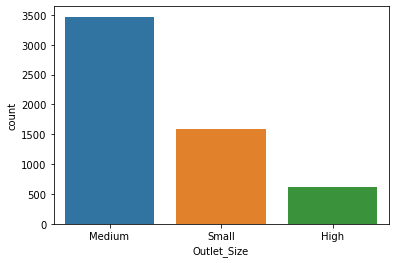

In [12]:
sns.countplot(x='Outlet_Size',data=nominal)
print(nominal['Outlet_Size'].value_counts())

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64


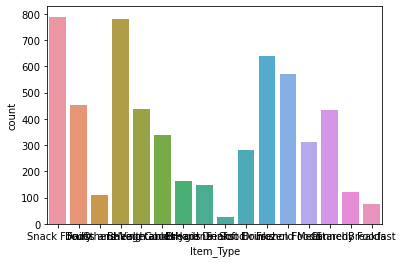

In [13]:
sns.countplot(x='Item_Type',data=nominal)
print(nominal['Item_Type'].value_counts())

Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64


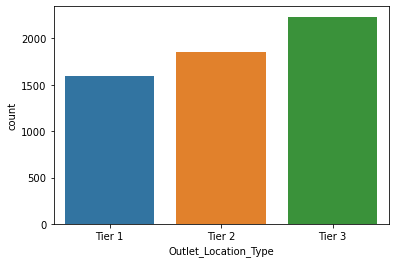

In [14]:
sns.countplot(x='Outlet_Location_Type',data=nominal)
print(nominal['Outlet_Location_Type'].value_counts())

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64


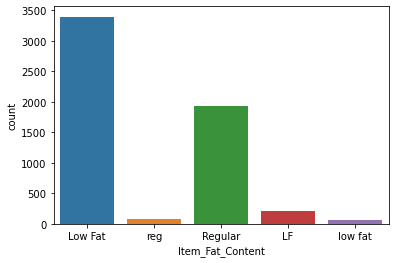

In [15]:
sns.countplot(x='Item_Fat_Content',data=nominal)
print(nominal['Item_Fat_Content'].value_counts())

In [16]:
ordinal=bmf[['Item_Identifier','Outlet_Establishment_Year']].copy()

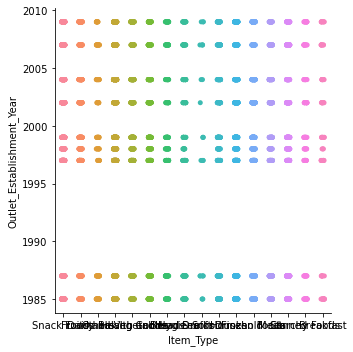

In [17]:
sns.catplot(x='Item_Type',y='Outlet_Establishment_Year',data=bmf)

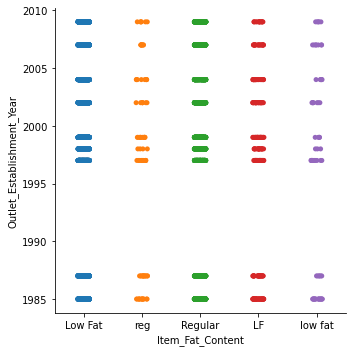

In [18]:
sns.catplot(x='Item_Fat_Content',y='Outlet_Establishment_Year',data=bmf)

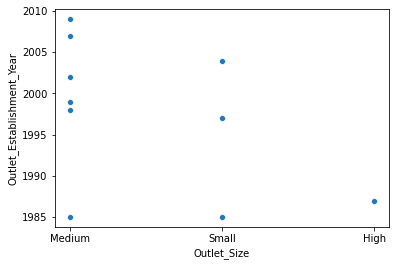

In [19]:
sns.scatterplot(x='Outlet_Size',y='Outlet_Establishment_Year',data=bmf)

In [20]:
continuous=bmf[['Item_Weight','Item_MRP']].copy()

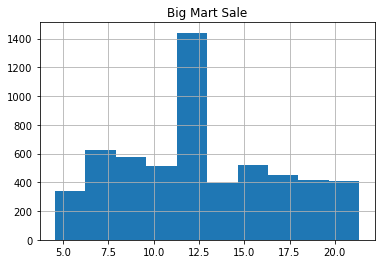

In [21]:
bmf['Item_Weight'].hist(grid=True)                # Univariate analysis
plt.title('Big Mart Sale')
plt.show()

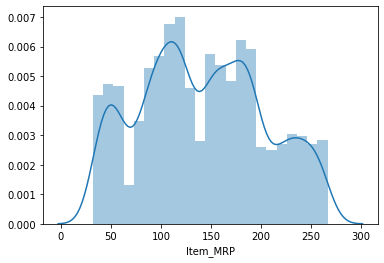

In [22]:
sns.distplot(continuous['Item_MRP'],kde=True)

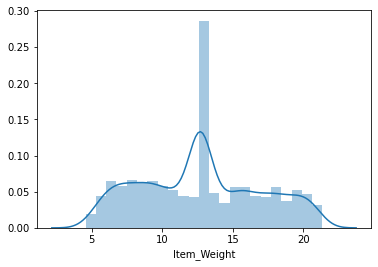

In [23]:
sns.distplot(continuous['Item_Weight'],kde=True)

# Ordinal Encoding

In [24]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in bmf.columns:
    if bmf[i].dtype=="object":
        bmf[i]=enc.fit_transform(bmf[i].values.reshape(-1,1))

In [25]:
bmf.dtypes

Item_Identifier              float64
Item_Weight                  float64
Item_Fat_Content             float64
Item_Visibility              float64
Item_Type                    float64
Item_MRP                     float64
Outlet_Identifier            float64
Outlet_Establishment_Year      int64
Outlet_Size                  float64
Outlet_Location_Type         float64
Outlet_Type                  float64
dtype: object

# Describe Dataset

In [26]:
bmf.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Identifier,5681.0,773.386376,445.525926,0.000,382.000000,771.000000,1160.000000,1542.000000
Item_Weight,5681.0,12.695633,4.245189,4.555,9.195000,12.695633,15.850000,21.350000
Item_Fat_Content,5681.0,1.368773,0.641085,0.000,1.000000,1.000000,2.000000,4.000000
Item_Visibility,5681.0,0.065684,0.051252,0.000,0.027047,0.054154,0.093463,0.323637
Item_Type,5681.0,7.233410,4.219057,0.000,4.000000,6.000000,10.000000,15.000000
Item_MRP,5681.0,141.023273,61.809091,31.990,94.412000,141.415400,186.026600,266.588400
Outlet_Identifier,5681.0,4.722760,2.837201,0.000,2.000000,5.000000,7.000000,9.000000
Outlet_Establishment_Year,5681.0,1997.828903,8.372256,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Outlet_Size,5681.0,1.170921,0.600328,0.000,1.000000,1.000000,2.000000,2.000000
Outlet_Location_Type,5681.0,1.112832,0.812824,0.000,0.000000,1.000000,2.000000,2.000000


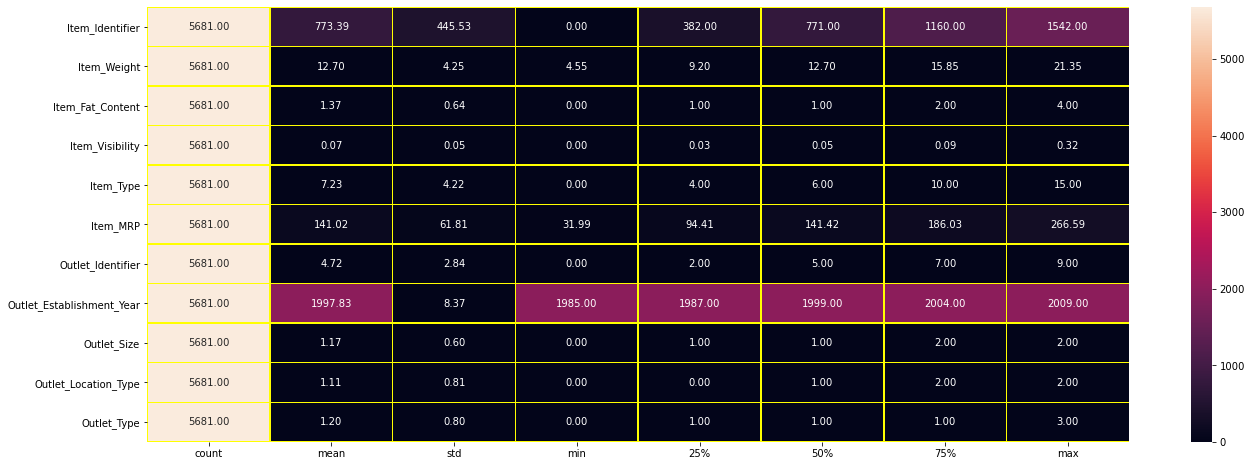

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,8))
sns.heatmap(bmf.describe().T,annot=True,linewidths=0.5,linecolor='yellow',fmt='0.2f')

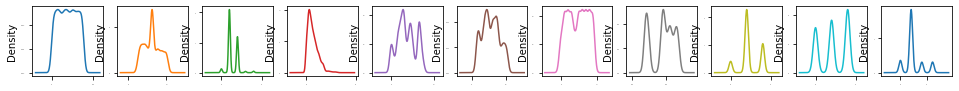

In [28]:
bmf.plot(kind='density',subplots=True,layout=(8,12),fontsize=1,figsize=(18,12),sharex=False,legend=False)
plt.show()

# Correlation

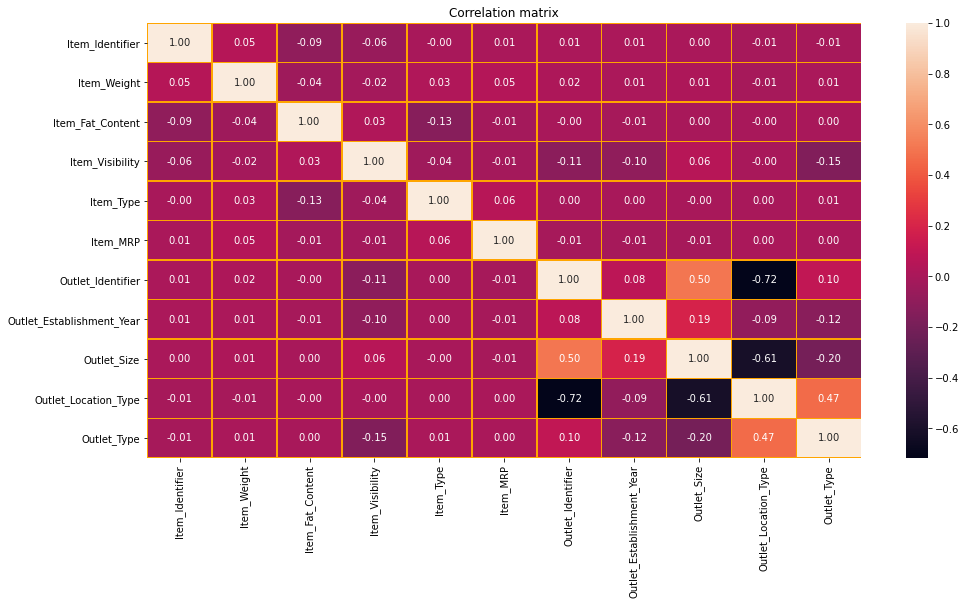

In [29]:
corr=bmf.corr()                                               # multivariate analysis
plt.figure(figsize=(16,8))
sns.heatmap(corr,annot=True,linewidths=0.5,linecolor='orange',fmt='.2f')
plt.title('Correlation matrix')
plt.show()

# Skewness in Dataset

In [30]:
bmf.skew()

Item_Identifier             -0.000020
Item_Weight                  0.142813
Item_Fat_Content             0.999629
Item_Visibility              1.238312
Item_Type                    0.096486
Item_MRP                     0.136182
Outlet_Identifier           -0.060209
Outlet_Establishment_Year   -0.396306
Outlet_Size                 -0.087108
Outlet_Location_Type        -0.209049
Outlet_Type                  0.927446
dtype: float64

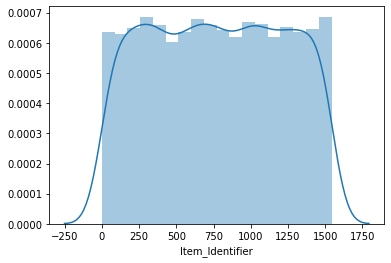

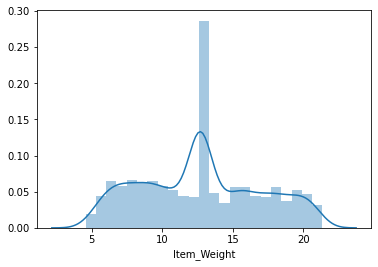

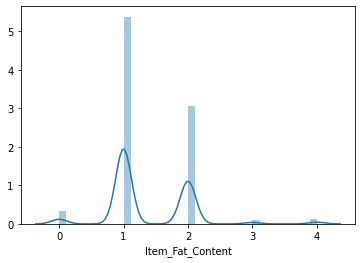

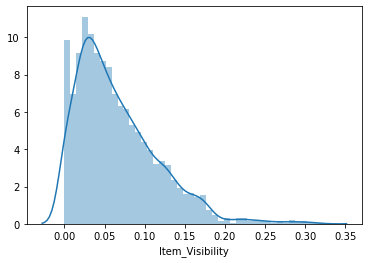

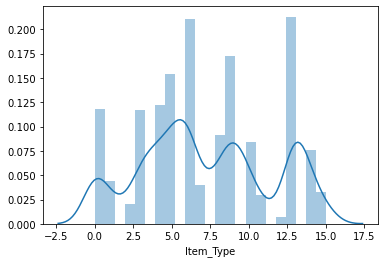

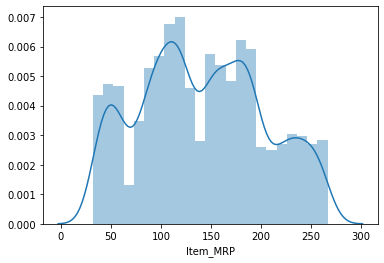

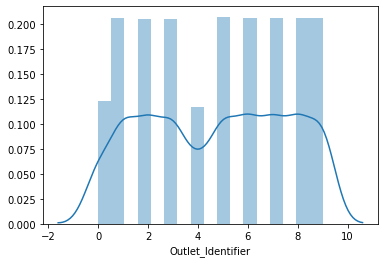

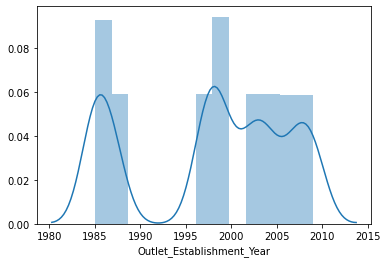

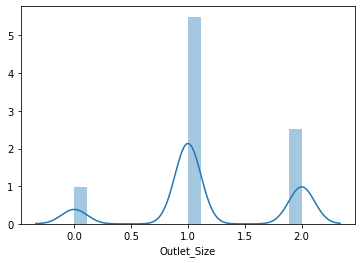

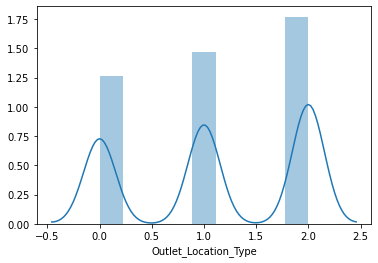

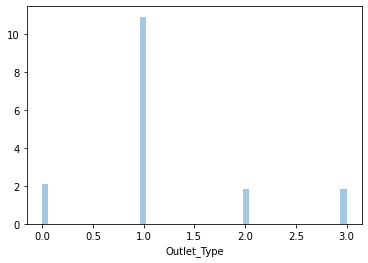

In [31]:
for j in bmf.columns:
    plt.figure()
    sns.distplot(bmf[j])

# Outliers in Dataset

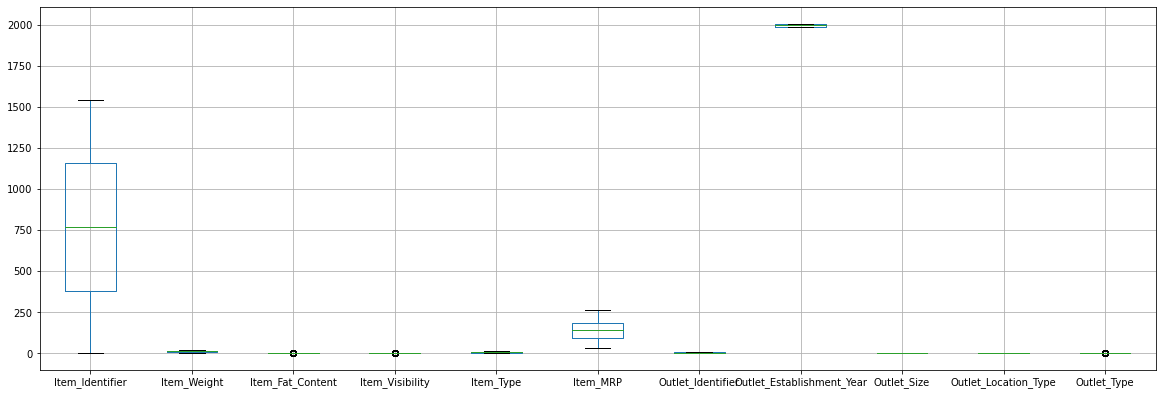

In [32]:
bmf.iloc[:,0:12].boxplot(figsize=(20,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

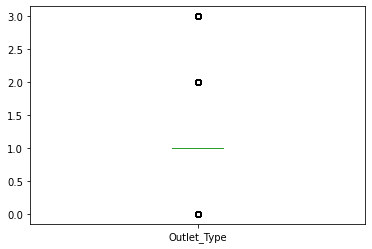

In [33]:
bmf['Outlet_Type'].plot.box()

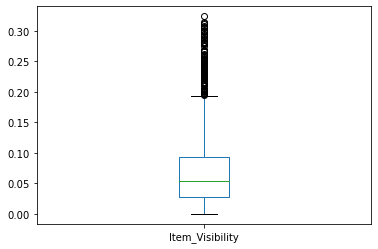

In [34]:
bmf['Item_Visibility'].plot.box()

# Loading the Model

In [35]:
import joblib
load=joblib.load('bigmart_sales_model.obj')

In [36]:
x_test=bmf.copy()

In [37]:
x_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103.0,20.750000,1.0,0.007565,13.0,107.8622,9.0,1999,1.0,0.0,1.0
1,1067.0,8.300000,4.0,0.038428,4.0,87.3198,2.0,2007,1.0,1.0,1.0
2,1406.0,14.600000,1.0,0.099575,11.0,241.7538,0.0,1998,1.0,2.0,0.0
3,809.0,7.315000,1.0,0.015388,13.0,155.0340,2.0,2007,1.0,1.0,1.0
4,1184.0,12.695633,2.0,0.118599,4.0,234.2300,5.0,1985,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
5676,231.0,10.500000,2.0,0.013496,13.0,141.3154,8.0,1997,2.0,0.0,1.0
5677,306.0,7.600000,2.0,0.142991,15.0,169.1448,3.0,2009,1.0,2.0,2.0
5678,1412.0,10.000000,1.0,0.073529,8.0,118.7440,7.0,2002,1.0,1.0,1.0
5679,517.0,15.300000,2.0,0.000000,3.0,214.6218,2.0,2007,1.0,1.0,1.0


In [38]:
prediction=load.predict(x_test)

In [39]:
prediction

array([0.72471733, 0.72471733, 0.29628353, ..., 0.72471733, 0.72471733,
       0.72471733])